# Exploration of relationship between ELG density in BASS/MzLS region and EBV

In [1]:
import fitsio
from matplotlib import pyplot as plt
import numpy as np

### densvar contains some functions to do help with the analysis

In [2]:
import densvar #loads some things in to memory at the start

256 True
test
30000000
28310826
26887015


In [4]:
'''
This is just if we need to make changes and reload densvar functions
'''
import importlib
importlib.reload(densvar)

256 True
test
30000000
28310826
26887015


<module 'densvar' from '/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py'>

### We can see that under-densities align with EBV

19577700
maximum brickid is 660727
0.0037939903395454166 0.3969409069389973


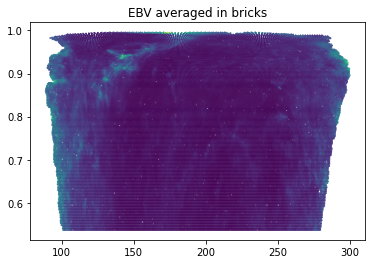

In [8]:
'''
lacking labels, but these all have ra on the x axis and sin(dec) on the y
'''
densvar.plot_brickprop('ELG','EBV','N')

19577700
maximum brickid is 660727
randoms done


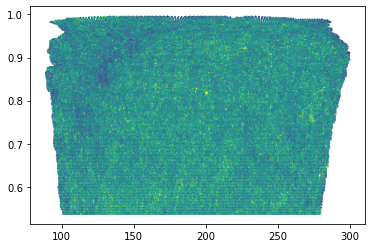

In [7]:
densvar.plot_brickdens('ELG',reg='N')

### Though, we can also see by eye that the depth is generally higher where EBV is higher, so we will want to be careful

19577700
maximum brickid is 660727
38.58268737792969 1626.160160459321


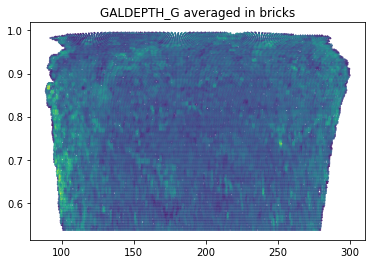

In [9]:
densvar.plot_brickprop('ELG','GALDEPTH_G','N')

### Look at the overall number density trends, using the property map produced by the target selection code

19577700
randoms done
97947
97947


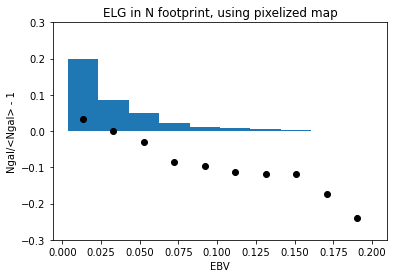

fraction of randoms not included in plot: 0.001501234642596493


In [10]:
densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.2)

19577700
randoms done
97947
97947


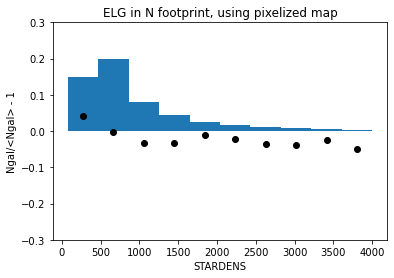

fraction of randoms not included in plot: 0.0012613228091448844


In [11]:
densvar.densvsimpar_pix('ELG','STARDENS',reg='N',vmax=4000)

19577700
randoms done
97947
97947


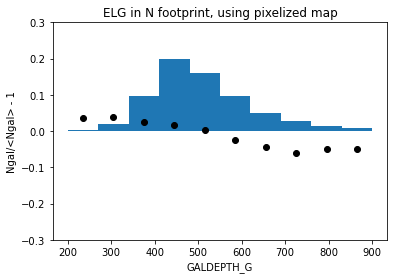

fraction of randoms not included in plot: 0.015533345854126043


In [24]:
densvar.densvsimpar_pix('ELG','GALDEPTH_G',reg='N',vmin=200,vmax=900)

19577700
randoms done
97947
97947


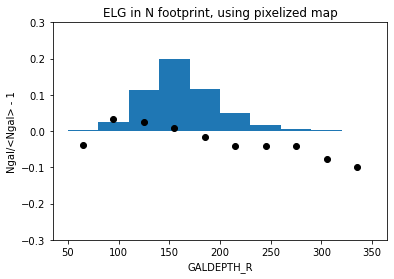

fraction of randoms not included in plot: 0.0038154804896218175


In [19]:
densvar.densvsimpar_pix('ELG','GALDEPTH_R',reg='N',vmin=50,vmax=350)

19577700
randoms done
97947
97947


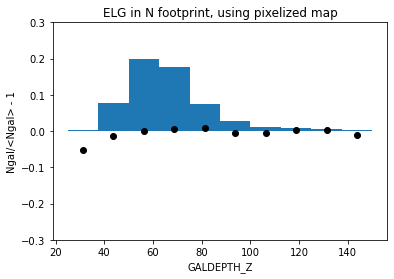

fraction of randoms not included in plot: 0.004165894621143081


In [20]:
densvar.densvsimpar_pix('ELG','GALDEPTH_Z',reg='N',vmin=25,vmax=150)

19577700
randoms done
97947
97947


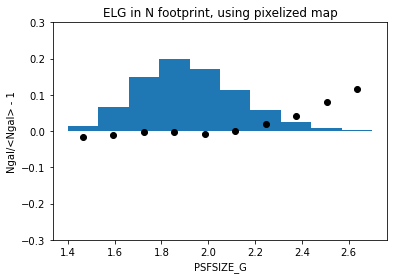

fraction of randoms not included in plot: 0.003897832012137606


In [21]:
densvar.densvsimpar_pix('ELG','PSFSIZE_G',reg='N',vmin=1.4,vmax=2.7)

19577700
randoms done
97947
97947


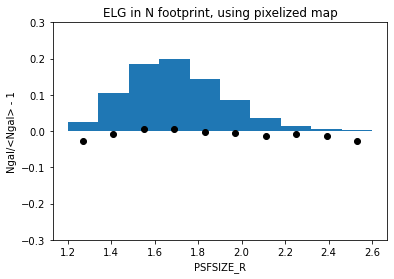

fraction of randoms not included in plot: 0.0017560621854833592


In [22]:
densvar.densvsimpar_pix('ELG','PSFSIZE_R',reg='N',vmin=1.2,vmax=2.6)

19577700
randoms done
97947
97947


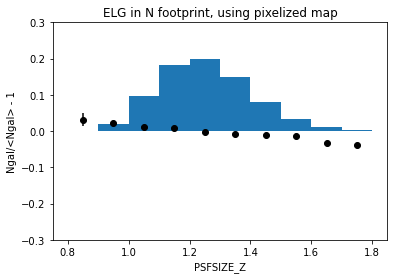

fraction of randoms not included in plot: 0.002110257764467083


In [23]:
densvar.densvsimpar_pix('ELG','PSFSIZE_Z',reg='N',vmin=.8,vmax=1.8)

### So, the trend with extinction is clearly strongest
### Test against a couple of extra derived maps, total expected (S/N)^2 for a flat 1 nmaggie source (EBV reduces S) and fraction that are MORPHTYPE = PSF

19577700
randoms done
97947
97947


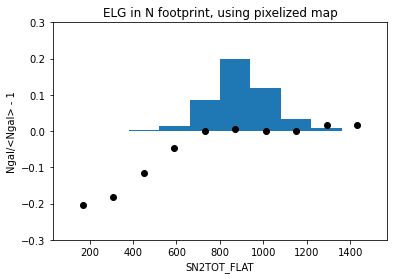

fraction of randoms not included in plot: 0.001575393028943619


In [25]:
densvar.densvsimpar_pix('ELG','SN2TOT_FLAT',reg='N',vmax=1500,vmin=100)

In [61]:
importlib.reload(densvar)

256 True
test
8135999
7815170
7439838


<module 'densvar' from '/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py'>

19577700
randoms done
97947
97947


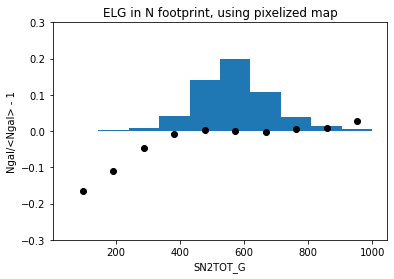

fraction of randoms not included in plot: 0.005208943879538209


In [65]:
densvar.densvsimpar_pix('ELG','SN2TOT_G',reg='N',vmax=1000,vmin=50)

19577700
randoms done
97947
97947


/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py:448: RuntimeWarning: invalid value encountered in true_divide
  parv = pixlgp[wp]/pixlg[wp]


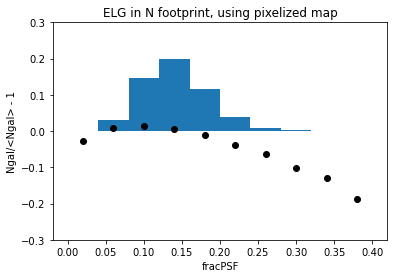

fraction of randoms not included in plot: 0.0013138429127901579


In [26]:
densvar.densvsimpar_pix('ELG','fracPSF',reg='N',vmax=.4,vmin=0)

### Those are similarly dramatic, and could be explained by overall S/N issues. Any chance they are driving things rather than EBV?
### No, cutting on these quantities doesn't remove trend with EBV, cutting on EBV does remove trends here (only showing latter)

19577700
randoms done
97947
68581


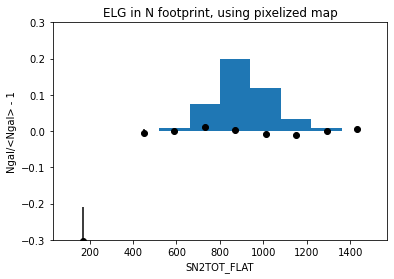

fraction of randoms not included in plot: 0.0015487195592056014


In [28]:
densvar.densvsimpar_pix('ELG','SN2TOT_FLAT',reg='N',vmax=1500,vmin=100,ebvcut=0.04)

19577700
randoms done
97947
68581


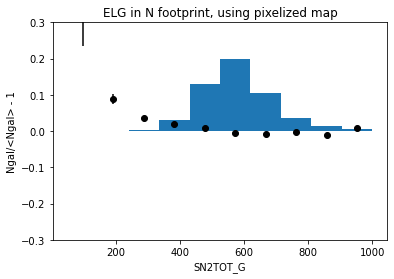

fraction of randoms not included in plot: 0.005912060892930951


In [66]:
densvar.densvsimpar_pix('ELG','SN2TOT_G',reg='N',vmax=1000,vmin=50,ebvcut=0.04)

19577700
randoms done
97947
68581


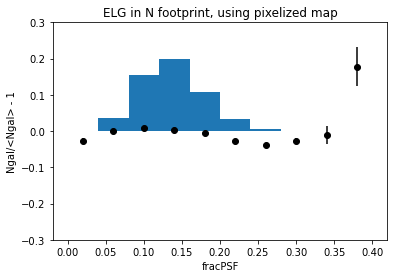

fraction of randoms not included in plot: 1.5908475593894325e-05


In [29]:
densvar.densvsimpar_pix('ELG','fracPSF',reg='N',vmax=.4,vmin=0,ebvcut=0.04)

### Pretty convincing EBV is driving the trend. If we remove EBV trend, do the rest look better?
### Also, going to add fluctuations expected from S/N variations, assuming Gaussian flux errors, etc., as in MCEff_ELG.py

In [30]:
#get MC efficiency
import os
import numpy as np
#from MCeff_ELG import *
mcf = fitsio.read(os.getenv('SCRATCH')+'/DR9mELGMCeffHSCHPext.fits')
mmc = np.mean(mcf['EFFALL'])
mcl = np.zeros(12*densvar.nside*densvar.nside)
for i in range(0,len(mcf)):
    pix = mcf['HPXPIXEL'][i]
    mcl[pix] = mcf['EFFALL'][i]/mmc

In [32]:
#load in pixel file as we will use it to define weights
pixfn      = '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.42.0/pixweight/main/resolve/dark/pixweight-dark.fits'
pf = fitsio.read(pixfn)


19577700
randoms done
97947
97532
786432 786432 786432 97532


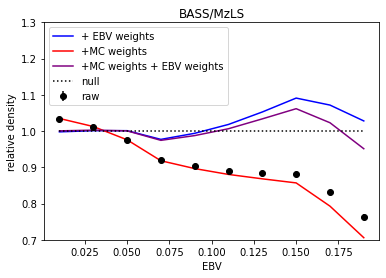

In [33]:
ws = 1./(1.05-.25/.15*pf['EBV']) #approximate linear relationship
densvar.plotvshp_compmc('ELG','EBV',(0,.2),mcl,ws,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

19577700
randoms done
97947
97532
786432 786432 786432 97532


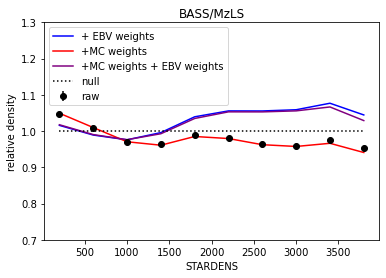

In [34]:
densvar.plotvshp_compmc('ELG','STARDENS',(0,4000),mcl,ws,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

### residual with stellar density is a bit weird...define extra weight for that

In [35]:
wss = np.ones(len(ws))
ss = pf['STARDENS'] > 1650
wss[ss] = .94

19577700
randoms done
97947
97532
786432 786432 786432 97532


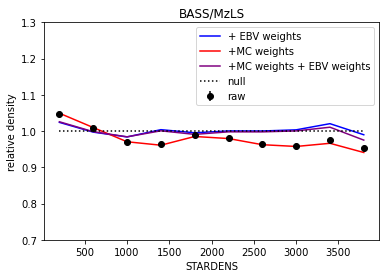

In [36]:
densvar.plotvshp_compmc('ELG','STARDENS',(0,4000),mcl,ws*wss,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

19577700
randoms done
97947
97532
786432 786432 786432 97532


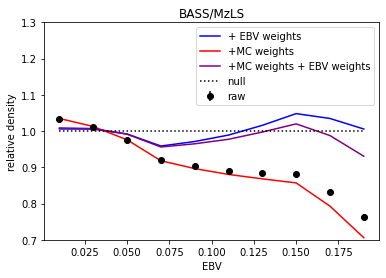

In [37]:
densvar.plotvshp_compmc('ELG','EBV',(0,.2),mcl,ws*wss,reg='N',title='BASS/MzLS',effac=1,gdzm=0)

### ok, not exactly perfect, but enough for illustration; look at the rest using same weights

19577700
randoms done
97947
97532
786432 786432 786432 97532


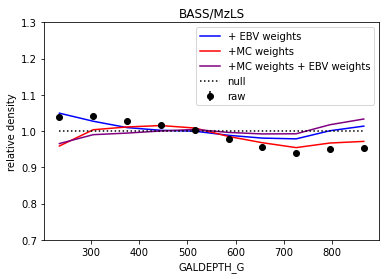

In [39]:
densvar.plotvshp_compmc('ELG','GALDEPTH_G',(200,900),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


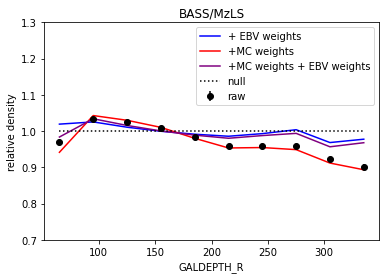

In [41]:
densvar.plotvshp_compmc('ELG','GALDEPTH_R',(50,350),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


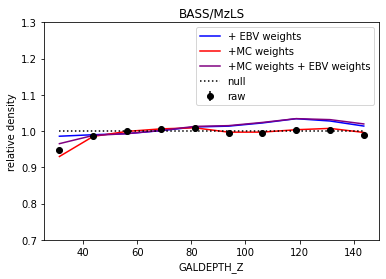

In [42]:
densvar.plotvshp_compmc('ELG','GALDEPTH_Z',(25,150),mcl,ws*wss,reg='N',title='BASS/MzLS')

### some residual with Z band depth; not clear if MC helps anything (at this point, it needs work)

19577700
randoms done
97947
97532
786432 786432 786432 97532


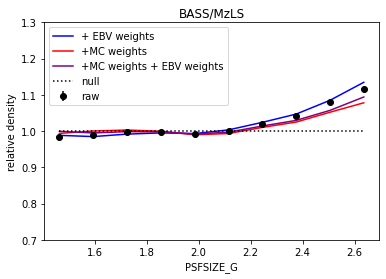

In [43]:
densvar.plotvshp_compmc('ELG','PSFSIZE_G',(1.4,2.7),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


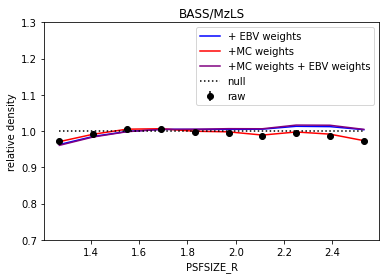

In [44]:
densvar.plotvshp_compmc('ELG','PSFSIZE_R',(1.2,2.6),mcl,ws*wss,reg='N',title='BASS/MzLS')

19577700
randoms done
97947
97532
786432 786432 786432 97532


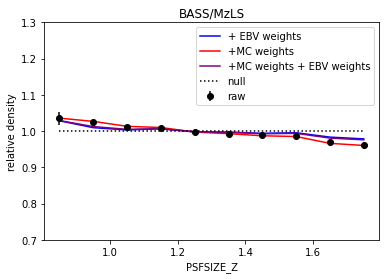

In [45]:
densvar.plotvshp_compmc('ELG','PSFSIZE_Z',(0.8,1.8),mcl,ws*wss,reg='N',title='BASS/MzLS')

### Nothing exciting cropping up with PSFSIZE; increase in target density at rather poor g-band seeing is interesting but very small portion of footprint

## Now, WHY would we see this kind of trend with EBV?

### If extinction map or band coefficients are mis-calibrated in this area, we would see trends with EBV. Can use MC to determine degree needed to reproduce observed results

In [3]:
import MCeff_ELG as MC

0.01485120570449451


30960259
randoms done
98007
98007


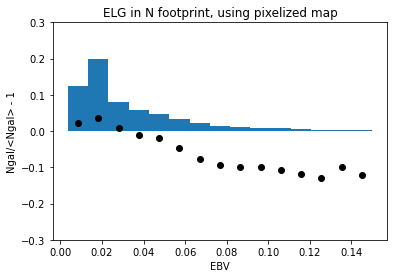

fraction of randoms not included in plot: 0.010404686668050549


In [5]:
#get points for comparison to model
dd,vd,ed = densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.15,nbin=15,ff='targetDR9m42sep26.fits')

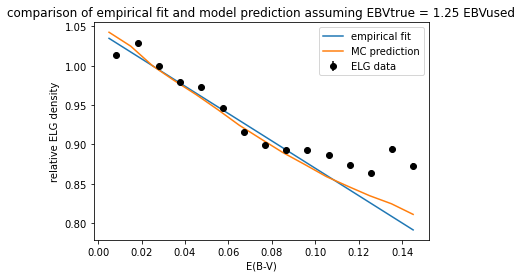

In [7]:
#this simulates effect of 25% calibration error in the region's EBV values; print out compares to relationship used above to get everything flat
ev = np.arange(0,.15,.01)+.005
ee = 1.0-.25/.15*ev #empirical "fit" above
rf = 1.
gf=1.
zf = 1.
v=ev[0]
#print(v)
#e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=10.**(-0.4*MC.R_R*v*EBVfac),zf=10.**(-0.4*MC.R_Z*v*EBVfac))
#print(e0)
EBVfac = 0.25
pl = []
#print('#ebv observed_trend predicted_trend')
for v,e in zip(ev,ee):
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=10.**(-0.4*MC.R_R*v*EBVfac),zf=10.**(-0.4*MC.R_Z*v*EBVfac))
    #print(ef,e0)
    #ef #/= e0
    
    #print(v,ef,e)
    pl.append(ef)
pl = np.array(pl)
plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd,vd/vd[2],ed,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density')
plt.title('comparison of empirical fit and model prediction assuming EBVtrue = 1.25 EBVused')
plt.legend()
plt.show()

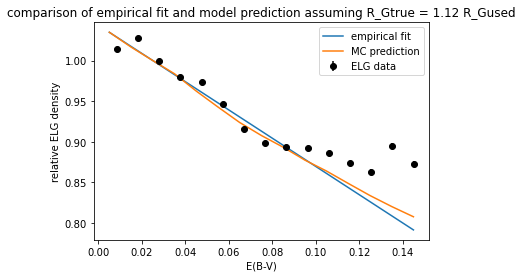

In [9]:
#this simulates effect of 12% calibration error in the region's R_G, assuming the rest are ok
ev = np.arange(0,.15,.01)+.005
ee = 1.0-.25/.15*ev #empirical "fit" above
rf = 1.
gf=1.
zf = 1.
v=0
#e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf)
EBVfac = 0.12
pl = []
for v,e in zip(ev,ee):
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.)
    #print(ef,e)
    pl.append(ef)
pl = np.array(pl)
plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd,vd/vd[2],ed,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density')
plt.title('comparison of empirical fit and model prediction assuming R_Gtrue = 1.12 R_Gused')
plt.legend()
plt.show()    

### So, it takes a 25% offset in EBV calibration, or a 12% offset in R_G (with other coefficients unaffected) to reproduce the trends. 
### If we look at the flux dependence, does this remain consistent?

### A 12% R_G offset is not that big in terms of bias on the fluxes. At E(B-V) = 0.1, it implies a 3.5% under-estimation of the g flux

30960259
11738729
1370026
randoms done
98007
98007


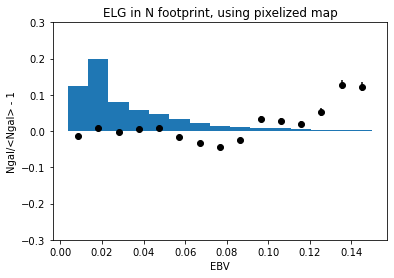

fraction of randoms not included in plot: 0.010404686668050549


In [10]:
#look at EBV relationship when a brighter flux cut is applied
ddc,dvc,dec = densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.15,nbin=15,gfluxcut=.8,ff='targetDR9m42sep26.fits')

### That flux cut removes trend, what does MC say?

In [58]:
importlib.reload(MC)

0.01485120570449451


<module 'MCeff_ELG' from '/global/u2/a/ajross/LSS/Sandbox/imaging/MCeff_ELG.py'>

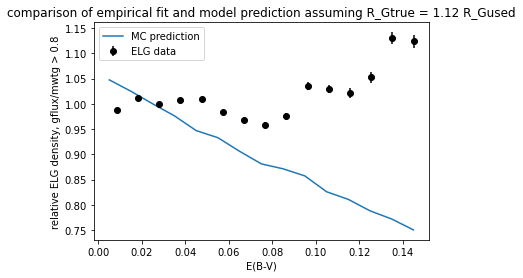

In [11]:
ev = np.arange(0,.15,.01)+0.005
rf = 1.
gf=1.
zf = 1.
gcut = .8
v=0
#e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gfluxcut=gcut)
EBVfac = 0.12
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.,gfluxcut=gcut)#/e0
    #ee = 1.0-.25/.15*v #used above
    #print(ef)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(ddc,dvc/dvc[2],dec,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.8')
plt.title('comparison of empirical fit and model prediction assuming R_Gtrue = 1.12 R_Gused')
plt.legend()
plt.show()    

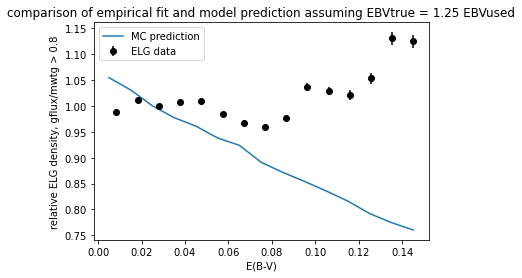

In [12]:
ev = np.arange(0,.15,.01)+.005
rf = 1.
gf=1.
zf = 1.
v=0
gcut = 0.8
#e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gfluxcut=gcut)
EBVfac = 0.25
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=10.**(-0.4*MC.R_R*v*EBVfac),zf=10.**(-0.4*MC.R_Z*v*EBVfac),gfluxcut=gcut)#/e0
    #ee = 1.0-.25/.15*v #used above
    #print(ef)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(ddc,dvc/dvc[2],dec,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.8')
plt.title('comparison of empirical fit and model prediction assuming EBVtrue = 1.25 EBVused')
plt.legend()
plt.show()        

### Shoot, MC expects even more dramatic change, either way...This suggests it is NOT some global extinction calibration

So, what is it??? Rongpu has pointed out that maybe SED implies pretty different R_G with redshift if the emission is line dominated. This would affect all regions, though...

### Next, look at color/mag histograms to isolate region we are missing ELGs from at high EBV

### No convenient functions for this, load in data/randoms

In [67]:
ef = '/project/projectdirs/desi/users/ajross/dr9/ELGtargetDR9m42wivar.fits' #where I wrote the ELG target file; this was the old one but was mostly complete in N
felg = fitsio.read(ef)

In [68]:
#cut it to BASS/MzLS region
wd = felg['PHOTSYS'] == 'N'
felg = felg[wd]
print(len(felg))

11666658


In [69]:
#read randoms
rall = fitsio.read('/global/cfs/cdirs/desi/target/catalogs/dr9m/0.42.0/randoms/resolve/randoms-randomized-1.fits')

In [70]:
#cut randoms to ELG footprint
keep = (rall['NOBS_G']>0) & (rall['NOBS_R']>0) & (rall['NOBS_Z']>0)
print(len(rall[keep]))
elgbits = [1,5,6,7,11,12,13]
keepelg = keep
for bit in elgbits:
    keepelg &= ((rall['MASKBITS'] & 2**bit)==0)
print(len(rall[keepelg]))
relg = rall[keepelg]

7815170
7439838


In [71]:
#cut randoms to BASS/MzLS
wn = relg['PHOTSYS'] == 'N'
relg = relg[wn]
print(len(relg))

4760082


In [78]:
ebvsplit = 0.1 #compare densities splitting sample at this ebv
wes = relg['EBV'] > ebvsplit
wed = felg['EBV'] > ebvsplit
fa = len(relg[wes])/len(relg[~wes]) #relative number of randoms on either side of split; to be used to compare densities
print(fa)

0.05100278510940177


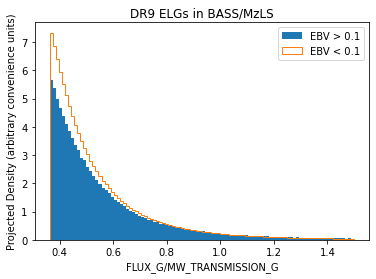

In [79]:
a = plt.hist(felg[wed]['FLUX_G']/felg[wed]['MW_TRANSMISSION_G'],bins=100,weights=np.ones(len(felg[wed]))/fa*1.e-5,range=(0.363,1.5),label='EBV > 0.1')
b = plt.hist(felg[~wed]['FLUX_G']/felg[~wed]['MW_TRANSMISSION_G'],weights=np.ones(len(felg[~wed]))*1.e-5,bins=a[1],histtype='step',label='EBV < 0.1')
plt.xlabel('FLUX_G/MW_TRANSMISSION_G')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend()
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

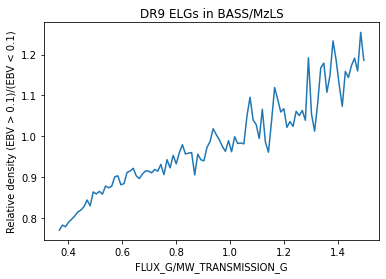

In [80]:
xl = []
for i in range(0,len(a[1])-1):
    xl.append((a[1][i]+a[1][i+1])/2.)
plt.plot(xl,a[0]/b[0])
plt.ylabel('Relative density (EBV > 0.1)/(EBV < 0.1)')
plt.xlabel('FLUX_G/MW_TRANSMISSION_G')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

## Very clearly, we are missing ELG targets on the faint end at high extinction. BUT plots above suggest this is NOT due to S/N cuts (unless somehow S/N cuts are systematically different than S/N estimates in catalogs)

### For completeness, look at other bands and colors

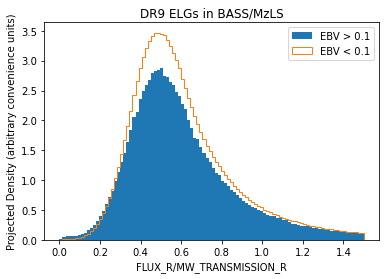

In [82]:
a = plt.hist(felg[wed]['FLUX_R']/felg[wed]['MW_TRANSMISSION_R'],bins=100,weights=np.ones(len(felg[wed]))/fa*1.e-5,range=(0,1.5),label='EBV > 0.1')
b = plt.hist(felg[~wed]['FLUX_R']/felg[~wed]['MW_TRANSMISSION_R'],weights=np.ones(len(felg[~wed]))*1.e-5,bins=a[1],histtype='step',label='EBV < 0.1')
plt.xlabel('FLUX_R/MW_TRANSMISSION_R')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend()
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

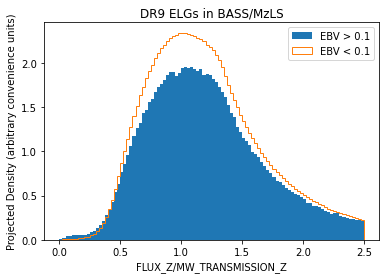

In [84]:
a = plt.hist(felg[wed]['FLUX_Z']/felg[wed]['MW_TRANSMISSION_Z'],bins=100,weights=np.ones(len(felg[wed]))/fa*1.e-5,range=(0,2.5),label='EBV > 0.1')
b = plt.hist(felg[~wed]['FLUX_Z']/felg[~wed]['MW_TRANSMISSION_Z'],weights=np.ones(len(felg[~wed]))*1.e-5,bins=a[1],histtype='step',label='EBV < 0.1')
plt.xlabel('FLUX_Z/MW_TRANSMISSION_Z')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend()
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

In [85]:
#convert to magnitudes for colors
g = 22.5 - 2.5*np.log10(felg['FLUX_G']/felg['MW_TRANSMISSION_G'])
r = 22.5 - 2.5*np.log10(felg['FLUX_R']/felg['MW_TRANSMISSION_R'])
z = 22.5 - 2.5*np.log10(felg['FLUX_Z']/felg['MW_TRANSMISSION_Z'])

In [86]:
gmr = g-r
rmz = r-z
c02 = gmr +1.2*rmz #color combos used in selection
clz = gmr-1.15*rmz 

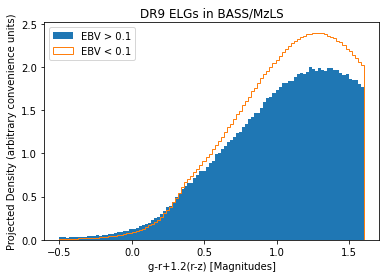

In [93]:
a = plt.hist(c02[wed],bins=100,range=(-.5,1.6),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(c02[~wed],bins=a[1],range=(-.5,1.6),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('g-r+1.2(r-z) [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

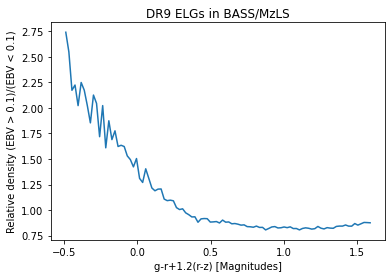

In [94]:
xl = []
for i in range(0,len(a[1])-1):
    xl.append((a[1][i]+a[1][i+1])/2.)
plt.plot(xl,a[0]/b[0])
plt.ylabel('Relative density (EBV > 0.1)/(EBV < 0.1)')
plt.xlabel('g-r+1.2(r-z) [Magnitudes]')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

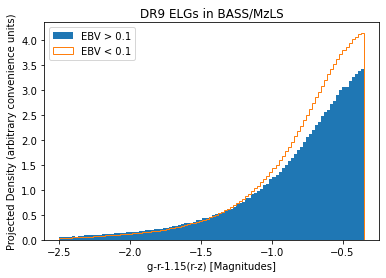

In [95]:
a = plt.hist(clz[wed],bins=100,range=(-2.5,-.35),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(clz[~wed],bins=a[1],range=(-2.5,-.35),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('g-r-1.15(r-z) [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

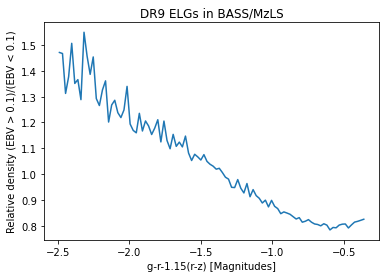

In [96]:
xl = []
for i in range(0,len(a[1])-1):
    xl.append((a[1][i]+a[1][i+1])/2.)
plt.plot(xl,a[0]/b[0])
plt.ylabel('Relative density (EBV > 0.1)/(EBV < 0.1)')
plt.xlabel('g-r-1.15(r-z) [Magnitudes]')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

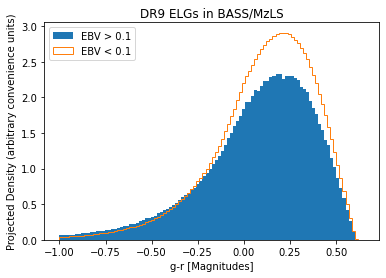

In [90]:
a = plt.hist(gmr[wed],bins=100,range=(-1.,.65),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(gmr[~wed],bins=a[1],range=(-1.,.65),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('g-r [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

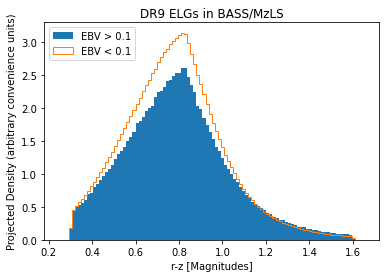

In [91]:
a = plt.hist(rmz[wed],bins=100,range=(.25,1.65),weights=np.ones(len(felg[wed]))/fa*1.e-5,label='EBV > 0.1')
b = plt.hist(rmz[~wed],bins=a[1],range=(.25,1.65),weights=np.ones(len(felg[~wed]))*1.e-5,label='EBV < 0.1',histtype='step')
plt.xlabel('r-z [Magnitudes]')
plt.ylabel('Projected Density (arbitrary convenience units)')
plt.legend(loc='upper left')
plt.title('DR9 ELGs in BASS/MzLS')
plt.show()

## Clearly, ELGs are missing closest to the edges of the selection, clearest trend is with g flux threshold

### What about bias in fluxes that is proportional to EBV, like somehow a sky background effect?

In [48]:
importlib.reload(MC)

0.01485120570449451


<module 'MCeff_ELG' from '/global/u2/a/ajross/LSS/Sandbox/imaging/MCeff_ELG.py'>

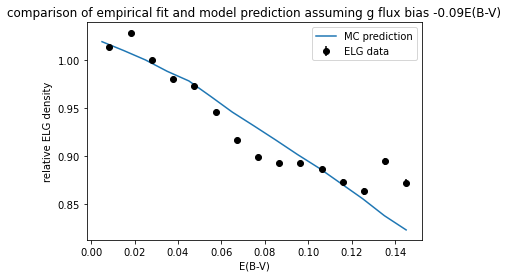

In [27]:
ev = np.arange(0,.15,.01)+.005
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False)
EBVfac = 0.09 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v)/e0
    #ee = 1.0-.25/.15*v #used above
    #print(ef,ee)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd,vd/vd[2],ed,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density')
plt.title('comparison of empirical fit and model prediction assuming g flux bias -0.09E(B-V)')
plt.legend()
plt.show()            

### So, a flux bias of delta g = -0.09*EBV does the trick for the full sample, see what happens with increased threshold

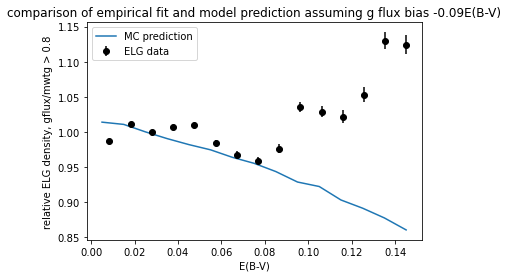

In [28]:
ev = np.arange(0,.15,.01)+0.005
v=0
gfc = 0.8
e0 = MC.ELGeffcalcExt(0.01,0.01,0.01,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
EBVfac = 0.11 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.01,0.01,0.01,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,gfluxcut=gfc)/e0
    ee = 1.0-.25/.15*v #used above
    #print(ef,ee)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(ddc,dvc/dvc[2],dec,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.8')
plt.title('comparison of empirical fit and model prediction assuming g flux bias -0.09E(B-V)')
plt.legend()
plt.show()      

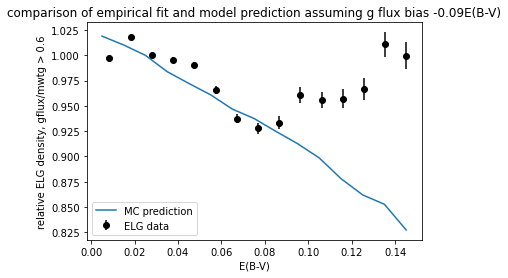

In [29]:
ev = np.arange(0,.15,.01)+0.005
v=0
gfc = 0.6
e0 = MC.ELGeffcalcExt(0.01,0.01,0.01,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
EBVfac = 0.11 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.01,0.01,0.01,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,gfluxcut=gfc)/e0
    ee = 1.0-.25/.15*v #used above
    #print(ef,ee)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd6,dv6/dv6[2],dec,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.6')
plt.title('comparison of empirical fit and model prediction assuming g flux bias -0.09E(B-V)')
plt.legend()
plt.show()      

### Applying a gflux bias works out to ~ EBV 0.08. Check adding bias to all bands

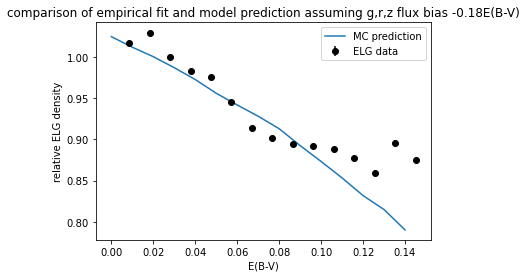

In [45]:
#flat deltas
ev = np.arange(0,.15,.01)
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False)
EBVfac = 0.18 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,dr=-EBVfac*v,dz=-EBVfac*v)/e0
    #ee = 1.0-.25/.15*v #used above
    #print(ef,ee)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd,vd/vd[2],ed,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density')
plt.title('comparison of empirical fit and model prediction assuming g,r,z flux bias -0.18E(B-V)')
plt.legend()
plt.show()          

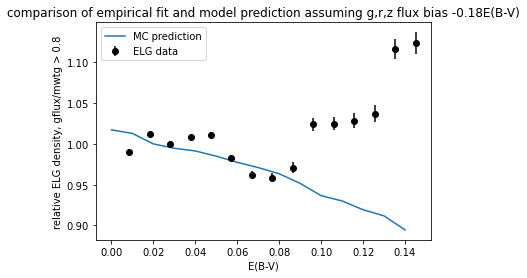

In [46]:
#flat deltas
ev = np.arange(0,.15,.01)
v=0
gfc=.8
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
EBVfac = 0.18 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,dr=-EBVfac*v,dz=-EBVfac*v,gfluxcut=gfc)/e0
    #ee = 1.0-.25/.15*v #used above
    #print(ef,ee)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(ddc,dvc/dvc[2],dec,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.8')
plt.title('comparison of empirical fit and model prediction assuming g,r,z flux bias -0.18E(B-V)')
plt.legend()
plt.show()    

30960259
11738729
3211457
randoms done
98007
98007


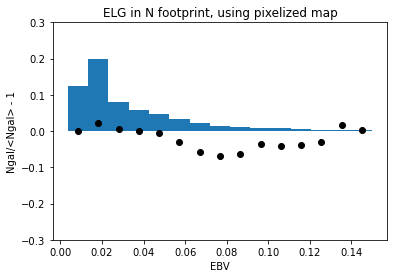

fraction of randoms not included in plot: 0.010404686668050549


In [20]:
dd6,dv6,de6 = densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.15,nbin=15,gfluxcut=.6,ff='targetDR9m42sep26.fits')

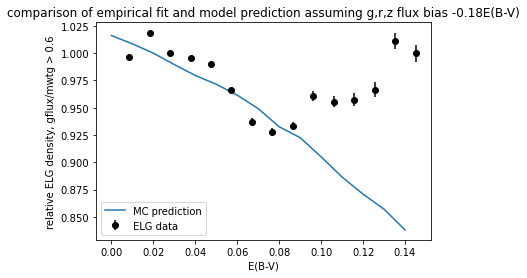

In [17]:
#flat deltas
ev = np.arange(0,.15,.01)
v=0
gfc=.6
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gfluxcut=gfc)
EBVfac = 0.18 #this gets multiplied by the EBV value and applied as an offset to the g flux
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,dg=-EBVfac*v,dr=-EBVfac*v,dz=-EBVfac*v,gfluxcut=gfc)/e0
    #ee = 1.0-.25/.15*v #used above
    #print(ef,ee)
    pl.append(ef)
pl = np.array(pl)
#plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd6,dv6/dv6[2],de6,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.6')
plt.title('comparison of empirical fit and model prediction assuming g,r,z flux bias -0.18E(B-V)')
plt.legend()
plt.show()    

### giving all bands the bias doesn't work at high EBV, but pretty good out to E(B-V) ~ 0.09

30960259
randoms done
98007
98007


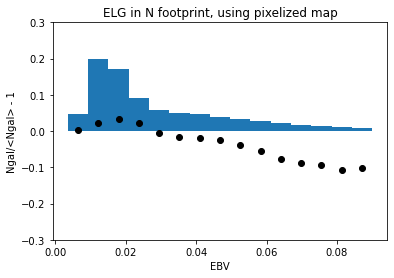

fraction of randoms not included in plot: 0.06291480079244577


In [21]:
#How much of footprint is at EBV > 0.09?
ddt,dvt,det = densvar.densvsimpar_pix('ELG','EBV',reg='N',vmax=.09,nbin=15,ff='targetDR9m42sep26.fits')

### Test changing R_G with gflux (put in erf function to transition from low flux effect to no additional high flux effect)

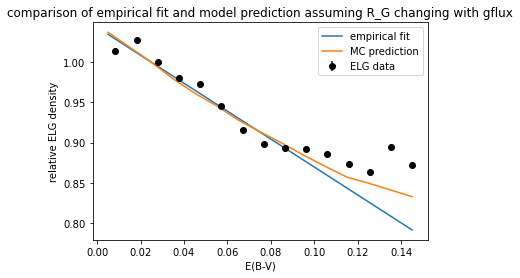

In [13]:
ev = np.arange(0,.15,.01)+.005
ee = 1.0-.25/.15*ev #empirical "fit" above
rf = 1.
gf=1.
zf = 1.
gef=2. #factor controls how quickly we go from effect to no effect
v=0
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gefac=gef)
EBVfac = 0.6 #factor at low flux
pl = []
for v,e in zip(ev,ee):
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.,gefac=gef)
    #print(ef,e)
    pl.append(ef)
pl = np.array(pl)
plt.plot(ev,ee/ee[2],label='empirical fit')
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd,vd/vd[2],ed,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density')
plt.title('comparison of empirical fit and model prediction assuming R_G changing with gflux')
plt.legend()
plt.show()    

### Now check to see how this performs at different flux thresholds

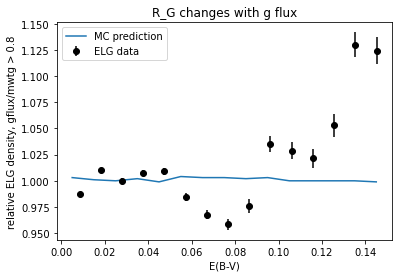

In [34]:
ev = np.arange(0,.15,.01)+0.005
rf = 1.
gf=1.
zf = 1.
gcut = .8
v=0
gef = 2.
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gfluxcut=gcut,gefac=gef)
EBVfac = 0.6
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.,gfluxcut=gcut,gefac=gef)#/e0
    pl.append(ef)
pl = np.array(pl)
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(ddc,dvc/dvc[2],dec,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.8')
plt.title('R_G changes with g flux')
plt.legend()
plt.show()    

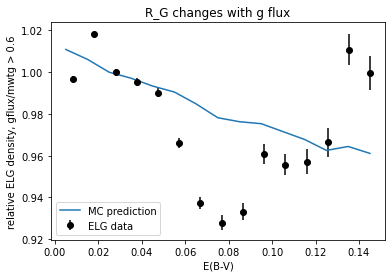

In [16]:
ev = np.arange(0,.15,.01)+0.005
rf = 1.
gf=1.
zf = 1.
gcut = .6
v=0
gef = 2.
e0 = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=gf,rf=rf,zf=zf,gfluxcut=gcut,gefac=gef)
EBVfac = 0.6
pl = []
for v in ev:
    ef = MC.ELGeffcalcExt(0.03,0.05,0.1,10.**(-0.4*MC.R_G*v),10.**(-0.4*MC.R_R*v),10.**(-0.4*MC.R_Z*v),south=False,gf=10.**(-0.4*MC.R_G*v*EBVfac),rf=1.,zf=1.,gfluxcut=gcut,gefac=gef)#/e0
    pl.append(ef)
pl = np.array(pl)
plt.plot(ev,pl/pl[2],label='MC prediction')
plt.errorbar(dd6,dv6/dv6[2],de6,fmt='ko',label='ELG data')
plt.xlabel('E(B-V)')
plt.ylabel('relative ELG density, gflux/mwtg > 0.6')
plt.title('R_G changes with g flux')
plt.legend()
plt.show()    

In [35]:
#look at percentage flux bias as function of g flux
from scipy.special import erf

gfd = np.arange(0.363,1.5,.01)
v = .1 #look at EBV = 0.1
gf=10.**(-0.4*MC.R_G*v*EBVfac)
gb = (gf+(1.-gf)*erf(gfd*gef))

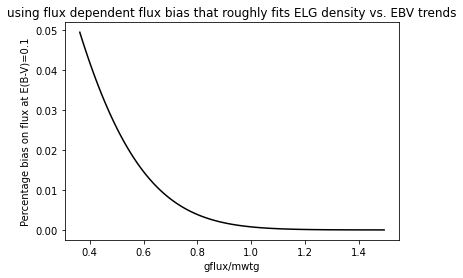

In [36]:
plt.plot(gfd,1.-gb,'k-')
plt.xlabel('gflux/mwtg')
plt.ylabel('Percentage bias on flux at E(B-V)=0.1')
plt.title('using flux dependent flux bias that roughly fits ELG density vs. EBV trends')
plt.show()

### So, a 5% bias at EBV = 0.1 at faint fluxes going 0 at flux ~1 could roughly explain the trends

## Now comparing different regions using sep 26th target run, using randoms 

30960259 26887015
11738729 11340082


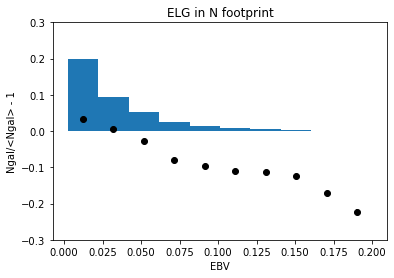

fraction of randoms not included in plot: 0.0015652444135765508


In [5]:
densvar.densvsimpar_ran('ELG','EBV',reg='N',vmax=.2,ff='targetDR9m42sep26.fits')

30960259 26887015
14157662 11385828


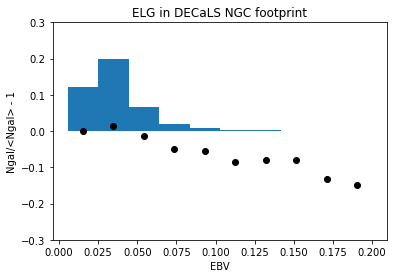

fraction of randoms not included in plot: 0.0006136576101448221


In [8]:
densvar.densvsimpar_ran('ELG','EBV',reg='DN',vmax=.2,ff='targetDR9m42sep26.fits')

30960259 26887015
5063868 4161105


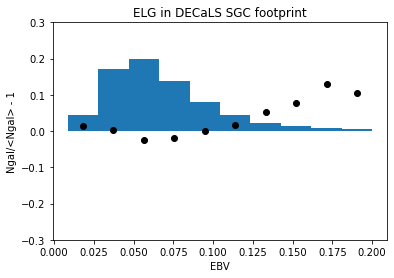

fraction of randoms not included in plot: 0.012664664794567789


In [9]:
densvar.densvsimpar_ran('ELG','EBV',reg='DS',vmax=.2,ff='targetDR9m42sep26.fits')

### so big difference between NGC and SGC again...
### have a look at LRGs for comparison

In [13]:
importlib.reload(densvar)

256 True
test
30000000
28310826
26887015


<module 'densvar' from '/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py'>

6428977 26887015
2481428
2481428
2481428 11340082


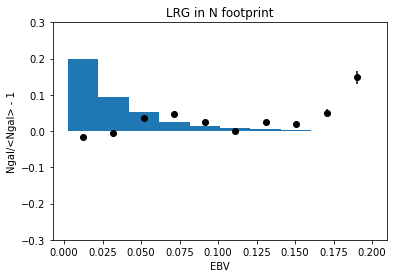

fraction of randoms not included in plot: 0.0015652444135765508


In [14]:
densvar.densvsimpar_ran('LRG','EBV',reg='N',vmax=.2,ff='targetDR9m42sep26.fits')

6428977 26887015
2883663
2883663
2883663 11385828


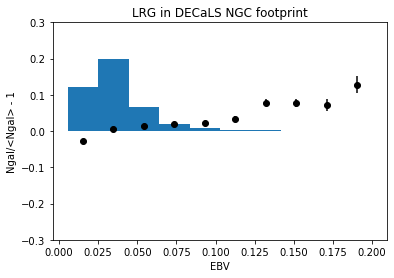

fraction of randoms not included in plot: 0.0006136576101448221


In [15]:
densvar.densvsimpar_ran('LRG','EBV',reg='DN',vmax=.2,ff='targetDR9m42sep26.fits')

6428977 26887015
1063886
1063886
1063886 4161105


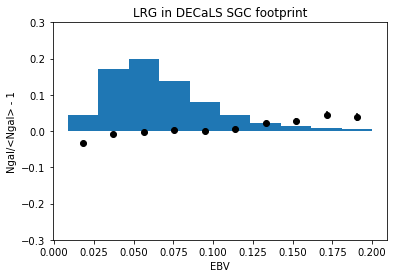

fraction of randoms not included in plot: 0.012664664794567789


In [16]:
densvar.densvsimpar_ran('LRG','EBV',reg='DS',vmax=.2,ff='targetDR9m42sep26.fits')

### LRGs are pretty similar in different regions

### below is an interesting finding: the trend in the fraction that are type PSF with EBV is different in the different regions

In [45]:
ef = '/project/projectdirs/desi/users/ajross/dr9/ELGtargetDR9m42sep26.fits' #where I wrote the ELG target file
felg = fitsio.read(ef)
wt = felg['MORPHTYPE'] == 'PSF'
wn = felg['PHOTSYS'] == 'N'
wtn = wt & wn
wdn = felg['PHOTSYS'] == 'S'
wdn &= (felg['RA'] < 300) & (felg['RA'] > 100) & (felg['DEC'] > -20)
wtdn = wdn & wt
wds = (wdn == 0) & (wn == 0)
wtds = wds & wt

[0.13353819 0.14274528 0.14604949 0.1495575  0.15591062 0.15899382
 0.16674542 0.17837542 0.20378237 0.24715038]
[0.10256402 0.1028155  0.10932683 0.1227002  0.14760548 0.15382889
 0.16005576 0.15526693 0.16158552 0.18140404]
[0.09300651 0.11309327 0.12227158 0.12241897 0.12507516 0.11709172
 0.11235103 0.10950341 0.11004645 0.10746097]


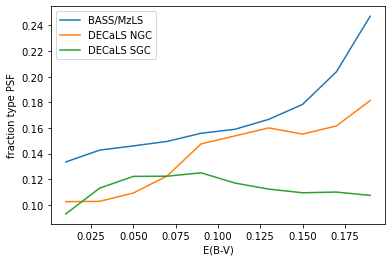

In [47]:
a = plt.hist(felg[wn]['EBV'],range=(0,.2))
b = plt.hist(felg[wtn]['EBV'],bins=a[1])
print(b[0]/a[0])
dna = plt.hist(felg[wdn]['EBV'],range=(0,.2))
dnb = plt.hist(felg[wtdn]['EBV'],bins=a[1])
print(dnb[0]/dna[0])
dsa = plt.hist(felg[wds]['EBV'],range=(0,.2))
dsb = plt.hist(felg[wtds]['EBV'],bins=a[1])
print(dsb[0]/dsa[0])
plt.clf()
ev = []
for i in range(0,len(a[0])):
    ev.append((a[1][i]+a[1][i+1])/2.)
plt.plot(ev,b[0]/a[0],label='BASS/MzLS')
plt.plot(ev,dnb[0]/dna[0],label='DECaLS NGC')
plt.plot(ev,dsb[0]/dsa[0],label='DECaLS SGC')
plt.legend()
plt.xlabel('E(B-V)')
plt.ylabel('fraction type PSF')
plt.show()
              

### below here is exploratory

In [18]:
import fitsio
ef = '/project/projectdirs/desi/users/ajross/dr9/ELGtargetDR9m42sep26.fits' #where I wrote the ELG target file
felg = fitsio.read(ef)

In [19]:
wt = felg['MORPHTYPE'] == 'PSF'

In [21]:
wn = felg['PHOTSYS'] == 'N'

In [20]:
len(felg[wt])/len(felg)

0.1219720416421581

In [24]:
wtn = (felg['PHOTSYS'] == 'N') & (felg['MORPHTYPE'] == 'PSF')

In [26]:
len(felg[wtn])/len(felg[wn])

0.14108086147997795

In [27]:
wts = (felg['PHOTSYS'] == 'S') & (felg['MORPHTYPE'] == 'PSF')

In [28]:
len(felg[wts])/len(felg[~wn])

0.1103021455628142

In [31]:
wdn = felg['PHOTSYS'] == 'S'
wdn &= (felg['RA'] < 300) & (felg['RA'] > 100) & (felg['DEC'] > -20)
wtdn = wdn & wt

In [32]:
len(felg[wtdn])/len(felg[wdn])

0.1071979257592108

In [33]:
wds = (wdn == 0) & (wn == 0)

In [35]:
wtds = wds & wt

In [36]:
len(felg[wtds])/len(felg[wds])

0.11898098449643632

[0.13353819 0.14274528 0.14604949 0.1495575  0.15591062 0.15899382
 0.16674542 0.17837542 0.20378237 0.24715038]


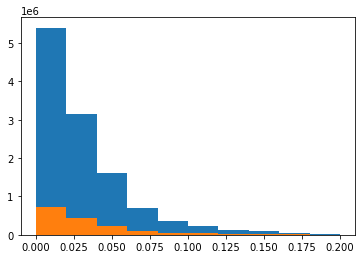

In [40]:
from matplotlib import pyplot as plt
a = plt.hist(felg[wn]['EBV'],range=(0,.2))
b = plt.hist(felg[wtn]['EBV'],bins=a[1])
print(b[0]/a[0])

[0.10256402 0.1028155  0.10932683 0.1227002  0.14760548 0.15382889
 0.16005576 0.15526693 0.16158552 0.18140404]


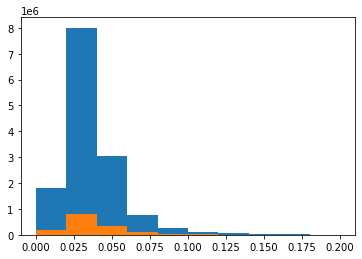

In [41]:
from matplotlib import pyplot as plt
dna = plt.hist(felg[wdn]['EBV'],range=(0,.2))
dnb = plt.hist(felg[wtdn]['EBV'],bins=a[1])
print(dnb[0]/dna[0])

[0.09300651 0.11309327 0.12227158 0.12241897 0.12507516 0.11709172
 0.11235103 0.10950341 0.11004645 0.10746097]


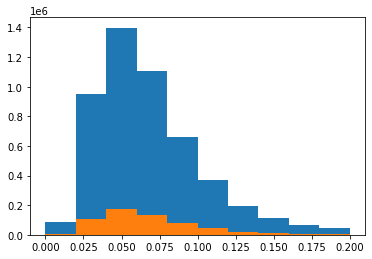

In [43]:
dsa = plt.hist(felg[wds]['EBV'],range=(0,.2))
dsb = plt.hist(felg[wtds]['EBV'],bins=a[1])
print(dsb[0]/dsa[0])

In [9]:
o12 = fitsio.read('/global/cscratch1/sd/yeche/overlap/dr9m_overlap_100_120.fits',ext=1)

In [59]:
o17 = fitsio.read('/global/cscratch1/sd/yeche/overlap/dr9m_overlap_150_170.fits',ext=1)

In [61]:
oc = np.hstack((o12,o17))

In [62]:
print(len(o12),len(o17),len(oc))

1078124 1289405 2367529


In [12]:
o12.dtype.names

('RA',
 'DEC',
 'TYPE',
 'g',
 'r',
 'z',
 'W1',
 'W2',
 'g_err',
 'r_err',
 'z_err',
 'W1_err',
 'W2_err',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'g_depth',
 'r_depth',
 'z_depth',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'DCHISQ',
 'BRICKNAME',
 'BRICKID',
 'OBJID',
 'MASKBITS',
 'TYPE_north',
 'g_north',
 'r_north',
 'z_north',
 'W1_north',
 'W2_north',
 'FLUX_G_north',
 'FLUX_R_north',
 'FLUX_Z_north')

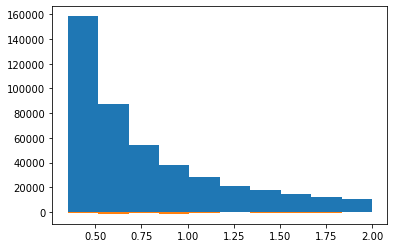

In [37]:
w = o12['FLUX_G']/o12['MW_TRANSMISSION_G'] < 2
w &= o12['FLUX_G']/o12['MW_TRANSMISSION_G'] > 0.35
aa = plt.hist(o12['FLUX_G'][w]/o12['MW_TRANSMISSION_G'][w])
bb = plt.hist(o12['FLUX_G'][w]/o12['MW_TRANSMISSION_G'][w],weights=o12['FLUX_G_north'][w]-o12['FLUX_G'][w],bins=a[1])

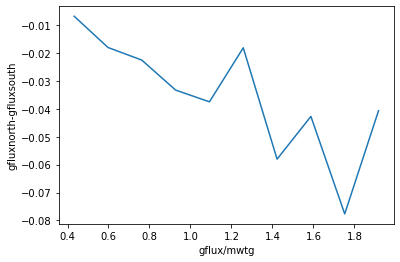

In [39]:
gf = a[1][:-1]+(a[1][1]-a[1][0])/2.
plt.plot(gf,bb[0]/aa[0])
plt.xlabel('gflux/mwtg')
plt.ylabel('gfluxnorth-gfluxsouth')
plt.show()

In [25]:
np.mean(o12['FLUX_G_north'][w]-o12['FLUX_G'][w])

-0.002933387

In [18]:
np.min(o12['FLUX_G_north']-o12['FLUX_G'])

-172126.92

In [21]:
np.max(o12['FLUX_G'])

1446255.2

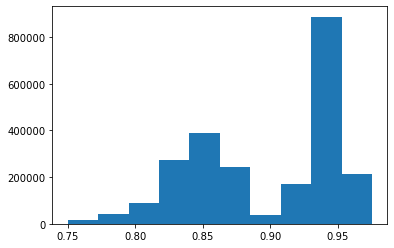

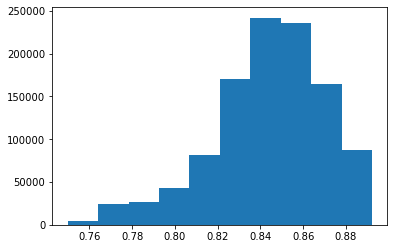

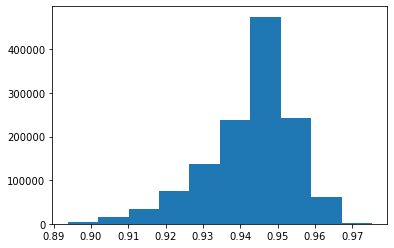

In [69]:
plt.hist(oc['MW_TRANSMISSION_G'])
plt.show()
plt.hist(o12['MW_TRANSMISSION_G'])
plt.show()
plt.hist(o17['MW_TRANSMISSION_G'])
plt.show()


In [72]:
w = oc['FLUX_G']/oc['MW_TRANSMISSION_G'] < 2
w &= oc['FLUX_G']/oc['MW_TRANSMISSION_G'] > 0.35
w &= oc['MW_TRANSMISSION_G'] < 0.81
print(len(oc[w]))
a = plt.hist(oc['FLUX_G'][w]/oc['MW_TRANSMISSION_G'][w])
b = plt.hist(oc['FLUX_G'][w]/oc['MW_TRANSMISSION_G'][w],weights=oc['FLUX_G_north'][w]-oc['FLUX_G'][w],bins=a[1])
plt.clf()

44728


<Figure size 432x288 with 0 Axes>

In [73]:
w = oc['FLUX_G']/oc['MW_TRANSMISSION_G'] < 2
w &= oc['FLUX_G']/oc['MW_TRANSMISSION_G'] > 0.35
w &= oc['MW_TRANSMISSION_G'] > 0.89
print(len(oc[w]))
al = plt.hist(oc['FLUX_G'][w]/oc['MW_TRANSMISSION_G'][w])
bl = plt.hist(oc['FLUX_G'][w]/oc['MW_TRANSMISSION_G'][w],weights=oc['FLUX_G_north'][w]-oc['FLUX_G'][w],bins=a[1])
plt.clf()

586572


<Figure size 432x288 with 0 Axes>

In [74]:
w = oc['FLUX_G']/oc['MW_TRANSMISSION_G'] < 2
w &= oc['FLUX_G']/oc['MW_TRANSMISSION_G'] > 0.35
w &= oc['MW_TRANSMISSION_G'] < 0.89
w &= oc['MW_TRANSMISSION_G'] > 0.81
print(len(oc[w]))
am = plt.hist(oc['FLUX_G'][w]/oc['MW_TRANSMISSION_G'][w])
bm = plt.hist(oc['FLUX_G'][w]/oc['MW_TRANSMISSION_G'][w],weights=oc['FLUX_G_north'][w]-oc['FLUX_G'][w],bins=a[1])
plt.clf()

396224


<Figure size 432x288 with 0 Axes>

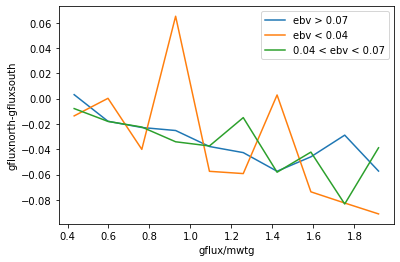

In [75]:
gf = a[1][:-1]+(a[1][1]-a[1][0])/2.
plt.plot(gf,b[0]/a[0],label='ebv > 0.07')
plt.plot(gf,bl[0]/al[0],label='ebv < 0.04')
plt.plot(gf,bm[0]/am[0],label='0.04 < ebv < 0.07')
plt.xlabel('gflux/mwtg')
plt.ylabel('gfluxnorth-gfluxsouth')
plt.legend()
plt.show()

In [53]:
10**(-.4*MC.R_G*.07)

0.8128454891934427

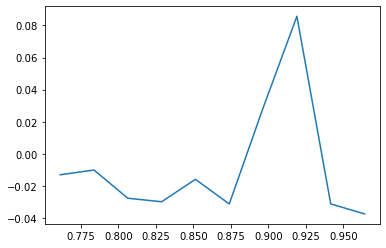

In [71]:
w = oc['FLUX_G']/oc['MW_TRANSMISSION_G'] < 2
w &= oc['FLUX_G']/oc['MW_TRANSMISSION_G'] > 0.35
a = plt.hist(oc['MW_TRANSMISSION_G'][w])
b = plt.hist(oc['MW_TRANSMISSION_G'][w],weights=oc['FLUX_G_north'][w]-oc['FLUX_G'][w],bins=a[1])
gf = a[1][:-1]+(a[1][1]-a[1][0])/2.
plt.clf()
plt.plot(gf,b[0]/a[0])
plt.show()

30960259
maximum brickid is 660727
randoms done


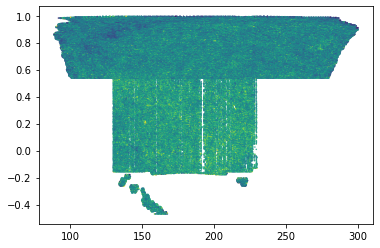

In [83]:
densvar.plot_brickdens('ELG',ff='targetDR9m42sep26.fits')

In [7]:
import importlib
importlib.reload(densvar)

256 True
test
30000000
28310826
26887015


<module 'densvar' from '/global/u2/a/ajross/LSS/Sandbox/imaging/densvar.py'>

In [7]:
import densvar

256 True
test
30000000
28310826
26887015


30960259
maximum brickid is 507753
randoms done


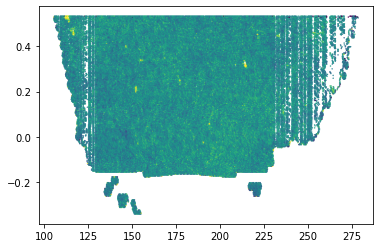

In [9]:
densvar.plot_brickdens('ELG',reg='DN',ff='targetDR9m42sep26.fits')

19577700
maximum brickid is 507592
randoms done


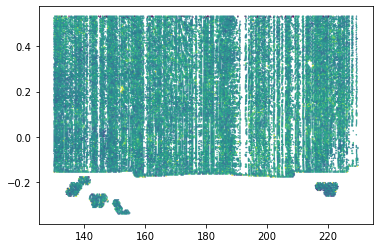

In [84]:
densvar.plot_brickdens('ELG',reg='DN')

30960259


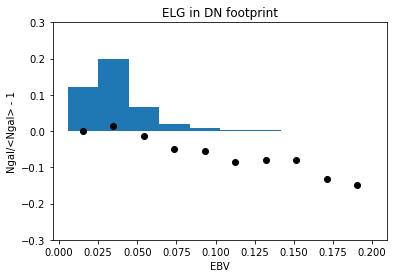

fraction of randoms not included in plot: 0.0006136576101448221


In [11]:
densvar.densvsimpar_ran('ELG','EBV',reg='DN',vmax=.2,ff='targetDR9m42sep26.fits')

30960259


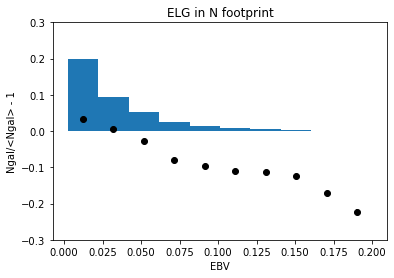

fraction of randoms not included in plot: 0.0015652444135765508


In [12]:
densvar.densvsimpar_ran('ELG','EBV',reg='N',vmax=.2,ff='targetDR9m42sep26.fits')

30960259


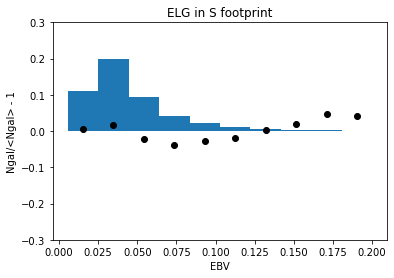

fraction of randoms not included in plot: 0.003839020853823709


In [13]:
densvar.densvsimpar_ran('ELG','EBV',reg='S',vmax=.2,ff='targetDR9m42sep26.fits')

256 True
test
30000000
28310826
26887015
30960259 26887015
5063868 4161105


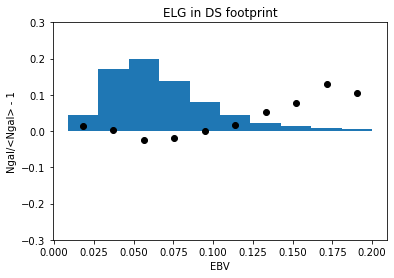

fraction of randoms not included in plot: 0.012664664794567789


In [1]:
import densvar
densvar.densvsimpar_ran('ELG','EBV',reg='DS',vmax=.2,ff='targetDR9m42sep26.fits')

19577700
randoms done
71070
71070


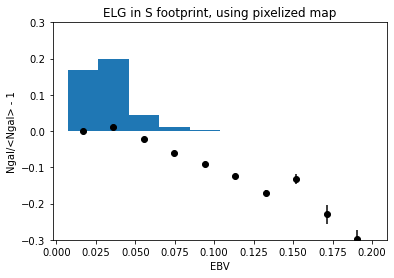

fraction of randoms not included in plot: 5.2243562473598345e-05


([0.016922682523727417,
  0.036193981766700745,
  0.055465273559093475,
  0.0747365728020668,
  0.09400786459445953,
  0.11327916383743286,
  0.1325504630804062,
  0.15182176232337952,
  0.17109304666519165,
  0.19036436080932617],
 array([0.99960575, 1.01153347, 0.97782688, 0.94031993, 0.91051963,
        0.87496045, 0.82909442, 0.86852387, 0.77049149, 0.7014115 ]),
 array([0.00056887, 0.00052414, 0.00108053, 0.00216049, 0.00370968,
        0.00769912, 0.00899173, 0.01423236, 0.02621265, 0.025767  ]))

In [78]:
densvar.densvsimpar_pix('ELG','EBV',reg='S',vmax=.2)

In [5]:
import fitsio
import numpy as np
rf = '/global/cscratch1/sd/adamyers/dr9m-sep26-2020/0.42.0/randoms/resolve/randoms-1-0.fits'
rr = fitsio.read(rf,rows=np.arange(int(3e7)))

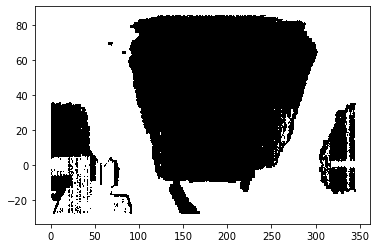

In [4]:
from matplotlib import pyplot as plt
plt.plot(rr['RA'],rr['DEC'],'k,')

In [8]:
del rr

### test